In [12]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

pickle_in = open("training.pickle","rb")
training_data = pickle.load(pickle_in)

pickle_in = open("testing.pickle","rb")
testing_data = pickle.load(pickle_in)

In [13]:
# separate image and label, and preprocess images
train_images = []
train_labels = []

for img,label,file in training_data:
    train_images.append(img)
    train_labels.append(label)

test_images = []
test_labels = []

for img,label,file in testing_data:
    test_images.append(img)
    test_labels.append(label)
    
# expand to 4d tensor
train_images = np.expand_dims(train_images, 3)
test_images = np.expand_dims(test_images, 3)

# normalize images
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

# binarize labels (one-hot vector encoding)
train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

In [14]:
params = {
    "num_classes": 7, # number of classifications
    "input_shape": (762,562,1), # input image size
    "conv_filters": 16, # number of convolutional filters on first convolutional layer
    "conv_kernel": (3,3), # convolutional filter sizes
    "pool_kernel": (2,2), # pooling window size
    "dense_size": 128, # size of first fully connected layer
    "learning_rate": 0.01, # learning rate
    "batch_size": 32, # number of images in a batch
    "epochs": 125, # number of epochs
    "dropout": 0.5 # dropout rate
}

In [15]:
def CNN(params):  
    # input image tensor
    inputs = tf.keras.layers.Input(shape = params["input_shape"])
    # first convolutional layer
    model = tf.keras.layers.Conv2D(params["conv_filters"], params["conv_kernel"], padding='same', activation=tf.nn.relu)(inputs)
    # first pooling layer
    model = tf.keras.layers.MaxPool2D(params["pool_kernel"])(model)
    # dropout layer
    model = tf.keras.layers.Dropout(params["dropout"])(model)
    # second convolutional layer
    model = tf.keras.layers.Conv2D((2*params["conv_filters"]), params["conv_kernel"], padding='same', activation=tf.nn.relu)(model)
    # second pooling layer
    model = tf.keras.layers.MaxPool2D(params["pool_kernel"])(model)
    # flattening layer
    model = tf.keras.layers.Flatten()(model)
    # first fully connected layer
    model = tf.keras.layers.Dense(params["dense_size"], activation=tf.nn.relu)(model)
    # second fully connected layer
    outputs = tf.keras.layers.Dense(params["num_classes"], activation=tf.nn.softmax)(model)
    # model
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    # SGD/optimizer
    optimizer = tf.keras.optimizers.SGD(lr=params["learning_rate"])
    # compile the model with loss, optimizer and evaluation metrics
    model.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=[tf.keras.metrics.categorical_accuracy])
    print(model.summary())
    return model

In [16]:
model = CNN(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 762, 562, 1)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 762, 562, 16)      160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 381, 281, 16)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 381, 281, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 381, 281, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 190, 140, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 851200)            0         
__________

In [17]:
history = model.fit(x=train_images, y=train_labels, batch_size=params["batch_size"],
          verbose=1, epochs=params["epochs"], validation_data=(test_images,test_labels))

Train on 882 samples, validate on 97 samples
Epoch 1/125
882/882 [==============================] - 174s 197ms/sample - loss: 2.9868 - categorical_accuracy: 0.1281 - val_loss: 1.9458 - val_categorical_accuracy: 0.1546
Epoch 2/125
882/882 [==============================] - 159s 180ms/sample - loss: 1.9429 - categorical_accuracy: 0.1667 - val_loss: 1.9430 - val_categorical_accuracy: 0.1959
Epoch 3/125
882/882 [==============================] - 157s 178ms/sample - loss: 1.9325 - categorical_accuracy: 0.1791 - val_loss: 1.9379 - val_categorical_accuracy: 0.1649
Epoch 4/125
882/882 [==============================] - 164s 186ms/sample - loss: 1.9174 - categorical_accuracy: 0.2098 - val_loss: 1.9297 - val_categorical_accuracy: 0.2680
Epoch 5/125
882/882 [==============================] - 169s 192ms/sample - loss: 1.8792 - categorical_accuracy: 0.2381 - val_loss: 1.9397 - val_categorical_accuracy: 0.1237
Epoch 6/125
882/882 [==============================] - 162s 183ms/sample - loss: 1.8169 - 

Epoch 48/125
882/882 [==============================] - 154s 175ms/sample - loss: 0.6423 - categorical_accuracy: 0.7494 - val_loss: 1.1254 - val_categorical_accuracy: 0.5979
Epoch 49/125
882/882 [==============================] - 155s 176ms/sample - loss: 0.7052 - categorical_accuracy: 0.7574 - val_loss: 1.0463 - val_categorical_accuracy: 0.6186
Epoch 50/125
882/882 [==============================] - 153s 174ms/sample - loss: 0.7013 - categorical_accuracy: 0.7347 - val_loss: 0.7644 - val_categorical_accuracy: 0.7732
Epoch 51/125
882/882 [==============================] - 154s 174ms/sample - loss: 0.6240 - categorical_accuracy: 0.7698 - val_loss: 0.9648 - val_categorical_accuracy: 0.7010
Epoch 52/125
882/882 [==============================] - 166s 189ms/sample - loss: 0.9166 - categorical_accuracy: 0.7052 - val_loss: 1.2242 - val_categorical_accuracy: 0.5464
Epoch 53/125
882/882 [==============================] - 159s 180ms/sample - loss: 0.7964 - categorical_accuracy: 0.7166 - val_loss

882/882 [==============================] - 155s 175ms/sample - loss: 0.3397 - categorical_accuracy: 0.8923 - val_loss: 1.2125 - val_categorical_accuracy: 0.6082
Epoch 96/125
882/882 [==============================] - 154s 175ms/sample - loss: 0.4050 - categorical_accuracy: 0.8594 - val_loss: 1.0600 - val_categorical_accuracy: 0.6598
Epoch 97/125
882/882 [==============================] - 155s 175ms/sample - loss: 0.6528 - categorical_accuracy: 0.8254 - val_loss: 0.9208 - val_categorical_accuracy: 0.6804
Epoch 98/125
882/882 [==============================] - 154s 174ms/sample - loss: 0.5677 - categorical_accuracy: 0.8265 - val_loss: 0.9296 - val_categorical_accuracy: 0.5876
Epoch 99/125
882/882 [==============================] - 154s 175ms/sample - loss: 0.5148 - categorical_accuracy: 0.8084 - val_loss: 0.7634 - val_categorical_accuracy: 0.7113
Epoch 100/125
882/882 [==============================] - 153s 174ms/sample - loss: 0.3208 - categorical_accuracy: 0.8866 - val_loss: 0.6796 - v

In [23]:
# make predictions from trained model
class_probabilities = model.predict(test_images)
# print(class_probabilities)
predictions = np.argmax(class_probabilities, axis=1)
print("Predictions: {}".format(predictions))
actual = np.argmax(test_labels, axis=1)
print("Actual: {}".format(actual))

Predictions: [6 4 6 5 4 0 3 2 4 2 4 0 5 3 2 6 0 4 2 2 6 6 4 3 0 4 2 4 0 6 6 0 2 2 4 0 5
 3 0 2 1 0 6 3 4 2 1 2 4 1 2 4 0 0 4 0 1 1 1 0 4 6 2 1 1 0 4 6 1 4 6 2 6 6
 4 0 5 2 3 2 1 5 5 4 0 1 3 2 3 6 4 2 0 3 1 2 4]
Actual: [6 4 6 5 4 0 3 2 1 2 4 0 5 3 2 6 6 4 2 2 6 6 4 3 6 1 2 4 3 6 6 5 2 2 4 3 5
 3 0 2 1 0 6 3 4 2 1 1 1 1 2 4 5 0 4 5 1 1 1 2 4 6 2 1 1 6 4 6 1 4 6 2 0 6
 4 0 2 3 3 2 5 5 5 4 0 1 3 2 3 6 4 2 0 3 1 2 4]


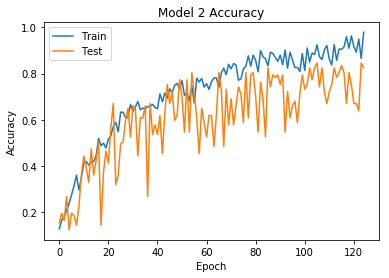

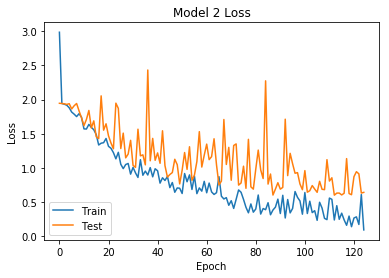

In [26]:
# Plot training & testing accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & testing loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.show()